In [1]:
from PIL import Image
from pylab import *

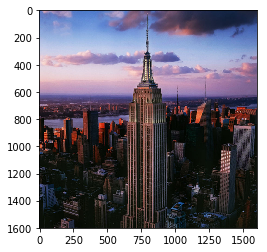

In [2]:
%matplotlib inline
im = array(Image.open('empire.jpg'))

imshow(im)

In [3]:
print(im.shape, im.dtype)

(1600, 1600, 3) uint8


In [4]:
# Now convert the image
im2 = array(Image.open('empire.jpg').convert('L'), 'f')
print(im2.shape, im2.dtype)

(1600, 1600) float32


In [5]:
def histogram_plot(im, nbr_bins=256):
    """Histogram of the image into grayscale"""
    imhist, bins = histogram(im.flatten(), nbr_bins, normed=True)
    cdf = imhist.cumsum()
    cdf = 255 * cdf / cdf[-1]
    
    im2 = interp(im.flatten(), bins[:-1], cdf)
    return im2.reshape(im.shape), cdf

In [6]:
im3, cdf = histogram_plot(im2)

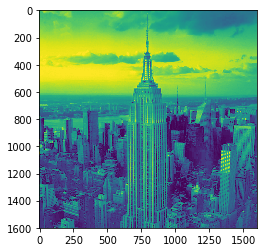

In [7]:
imshow(im3)

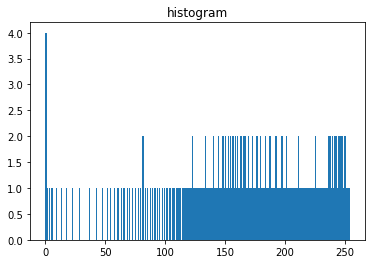

In [8]:
plt.hist(cdf, bins = list(range(0, 255))) 
plt.title("histogram") 
plt.show()

In [9]:
# PCA of an Image (Pricipla Component Analysis)
def pca_image(image):
    num_data, dim = image.shape
    
    mean_x = image.mean(axis=0)
    image = image - mean_x
    
    if dim > num_data:
        M = dot(image, image.T)
        e, EV = linalg.eigh(M)
        tmp = dot(image.T, EV).T
        V = tmp[::-1]
        S = sqrt(e)[::-1]
        for i in range(V.shape[1]):
            V[:, i] /= S
    
    else:
        U,S,V = linalg.svd(image)
        V = V[:num_data]
    
    return V,S, mean_x

In [10]:
V,S,immean = pca_image(im3)

In [12]:
print(immean.shape)

(1600,)


TypeError: Invalid dimensions for image data

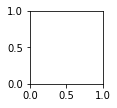

In [20]:
m, n = 1600, 1600

figure()
gray()
subplot(2, 4, 1)

imshow(immean)

for i in range(7):
    subplot(2,4,i+2)
    imshow(V[i].reshape(m, n))
    
show()    

In [13]:
# Pickle the object
import pickle

In [14]:
f = open('pickle_image.pkl', 'wb')
pickle.dump(im3, f)
pickle.dump(V, f)
f.close()

In [15]:
f = open('pickle_image.pkl', 'rb')
test_image = pickle.load(f)
V = pickle.load(f)
f.close()

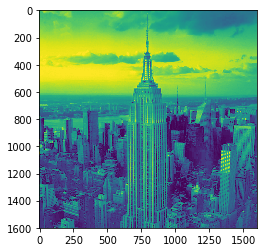

In [16]:
imshow(test_image)

In [17]:
# Guassian Blur
import numpy as np
from scipy.ndimage import filters

In [18]:
im4 = filters.gaussian_filter(im3, 5)

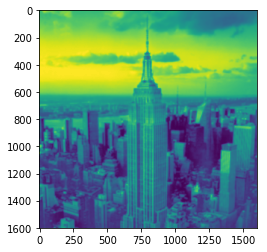

In [19]:
imshow(im4)

In [21]:
# Image Derivative
imx = np.zeros(im3.shape)
filters.sobel(im4, 0, imx)

In [23]:
imy = np.zeros(im4.shape)
filters.sobel(im4, 0, imy)

In [24]:
mag = np.sqrt(imx**2 + imy**2)

In [26]:
sigma = 5

imx = np.zeros(im3.shape)
filters.gaussian_filter(im4, (sigma, sigma), 0, imx)

imy = np.zeros(im3.shape)
filters.gaussian_filter(im4, (sigma, sigma), 0, imy)

In [27]:
# Denoise an Image

def denoise(im, U_init, tolerance=0.1, tau=0.125, tv_weight=100):
    """An implementation of the Rubin-Osher-Fatemi denoising model"""
    
    m,n = im.shape
    
    #initialize
    U = U_init
    Px, Py = im, im
    
    error = 1
    
    while(error > tolerance):
        GradUx = roll(U, -1, axis=1)
        GradYx = roll(U, -1, axis=0)
        
        PxNew = Px + (tau/tv_weight)*GradUx
        PyNew = Py + (tau/tv_weight)*GradYx
        
        NormNew = np.maximum(1, np.sqrt(PxNew**2 + PyNew**2))
        Px = PxNew/NormNew
        Py = PyNew/NormNew
        
        RxPx = roll(Px, 1, axis=1)
        RyPy = roll(Py, 1, axis=0)
        
        DivP  = (Px-RxPx) + (Py-RyPy)
        
        U = im + tv_weight*DivP
        
        return U, im-U

In [31]:
im = np.zeros((500, 500))
im[100:400, 100:400] = 128
im[200:300, 200:300]

im = im + 30*np.random.standard_normal((500, 500))

U, T = denoise(im, im)
G = filters.gaussian_filter(im, 10)


In [32]:
from scipy.misc import imsave
imsave('synth_rof.pdf', U)
imsave('synth_gaussian.pdf', G)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:2: DeprecationWarning: `imsave` is deprecated!
`imsave` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imwrite`` instead.
  
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:3: DeprecationWarning: `imsave` is deprecated!
`imsave` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imwrite`` instead.
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
# TODO: Make it look pretty and use MD for Github